<a href="https://colab.research.google.com/github/fabian819/DSF/blob/main/CodingTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 2

- Deadline (upload to Ilias): 2023-05-14 24:00
- Solutions in lecture on 2023-05-17
- Estimated effort: from 4 to 60 hours
- Images (data) on Ilias in the Data folder, the images.zip file
- Main notebook is number 11 for this task, however, also others may help you. You can also benefit a lot from googeling for code examples


## Subtasks (maximum 12.5 points)

- Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points] 
- With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]
- Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points] 
- Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

Work in teams and have fun ! 

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
# from skimage.external.tifffile import TiffFile

In [2]:
import skimage.filters as skf

In [3]:
import skimage.morphology as skm

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
# We need to convert the image HEIC formats to something more usual. Stack overflow suggests to use PIL for that. So we installs that.
!pip install pillow_heif 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 38.7 MB/s eta 0:00:00


### Subtask 1

In [20]:
mypath = '/content/drive/MyDrive/DSF/images/'

In [21]:
from os import listdir
from os.path import isfile, join
image_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]

The following cell reds the file and saves a copy as a png.

In [24]:
from PIL import Image
import pillow_heif

for name in image_names:
  heif_file = pillow_heif.read_heif(mypath + name)
  image = Image.frombytes(
        heif_file.mode,
        heif_file.size,
        heif_file.data.tobytes(),
        "raw",
    )
  image.save(mypath + name.split('.')[0] + ".png", format("png"))

### Subtask 2

In [41]:
#Get the image and discard upper half
imageRGB  = io.imread(mypath + 'IMG_5379.png')
image = imageRGB[:,:,2]
image = image[image.shape[0]//2:image.shape[0],:]

#Smoothing with mean
image_mean = skf.median(image,selem=skm.disk(10))

<ipython-input-41-ae9a2a26fd4a>:7: FutureWarning: `selem` is a deprecated argument name for `median`. It will be removed in version 1.0. Please use `footprint` instead.
  image_mean = skf.median(image,selem=skm.disk(10))


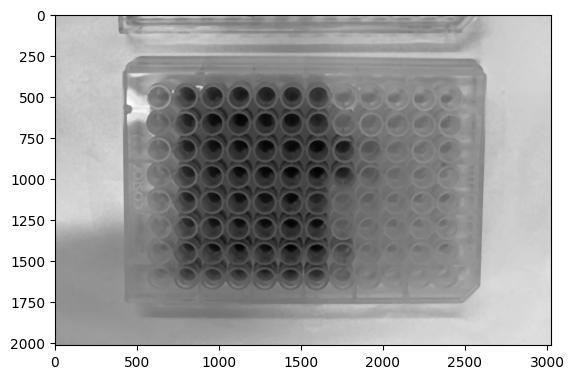

In [42]:
plt.imshow(image_mean, cmap='gray')

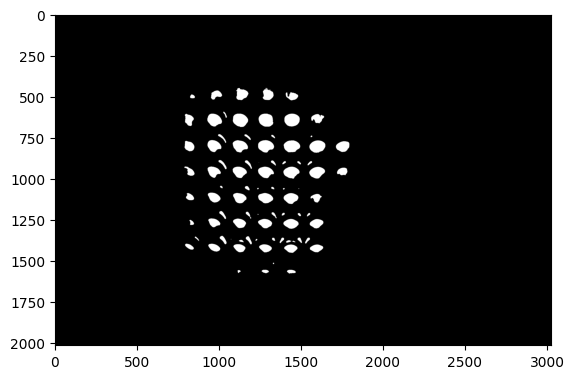

In [48]:
threshold_manual = 50
#create a mask using a logical operation
image_threshold = image_mean<threshold_manual

plt.imshow(image_threshold, cmap ='gray')
plt.show()